## LAB 1
### Objective:
- To understand the core structure of Reinforcement Learning by simulating an agent-environment
interaction loop in a simple Gridworld, and analyze how an agent behaves under a random policy.
#### Problem Statement:
- Simulate a basic agent in a Gridworld that selects actions randomly and logs rewards, state transitions.

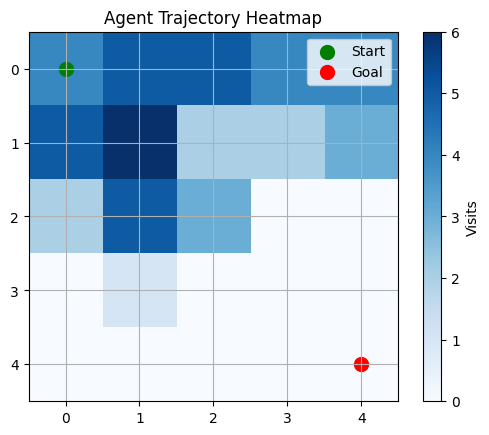

Episode 1: Total Reward = 0, Steps = 51


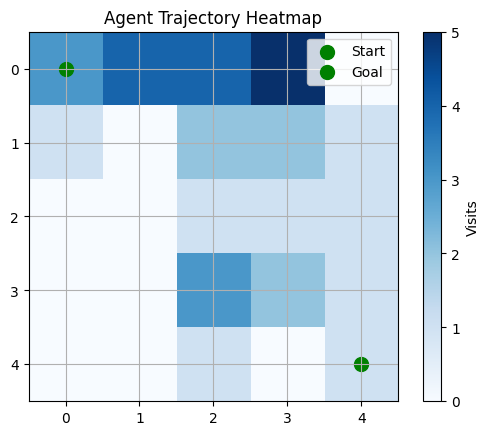

Episode 2: Total Reward = 10, Steps = 33


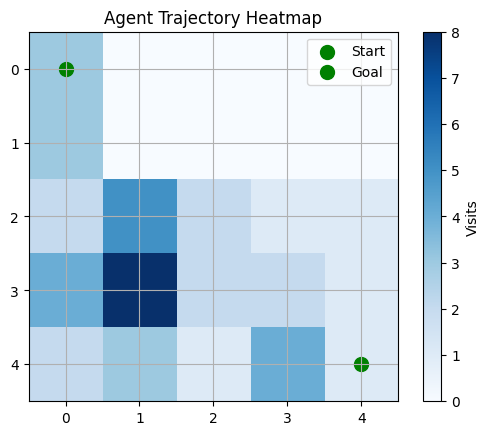

Episode 3: Total Reward = 10, Steps = 45


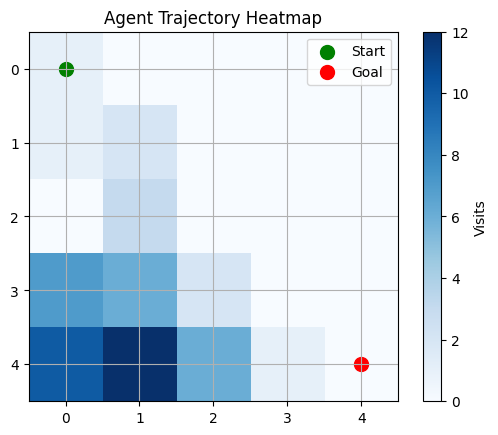

Episode 4: Total Reward = 0, Steps = 51


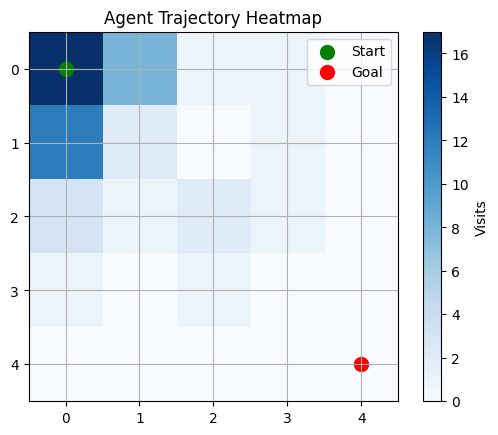

Episode 5: Total Reward = 0, Steps = 51


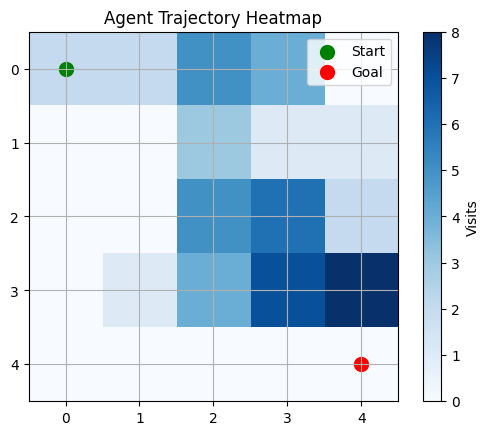

Episode 6: Total Reward = 0, Steps = 51


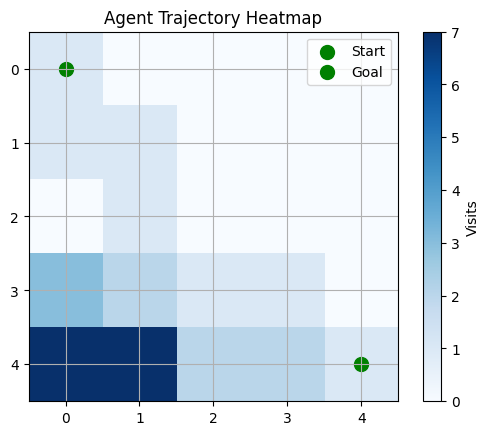

Episode 7: Total Reward = 10, Steps = 30


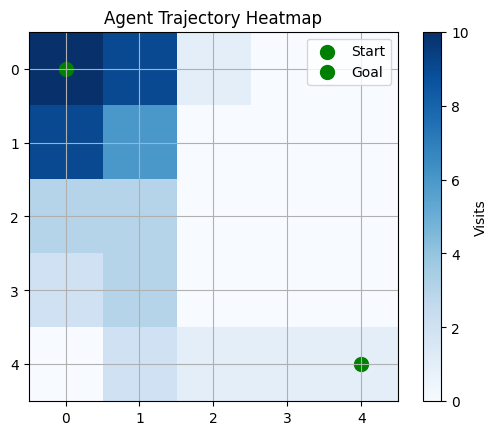

Episode 8: Total Reward = 10, Steps = 51


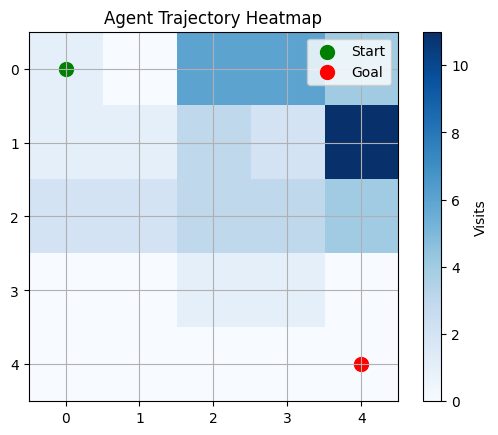

Episode 9: Total Reward = 0, Steps = 51


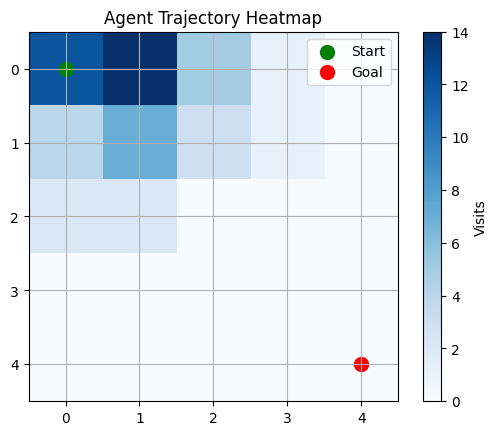

Episode 10: Total Reward = 0, Steps = 51


In [19]:

import numpy as np
import matplotlib.pyplot as plt

GRID_SIZE = 5
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_DICT = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}
GOAL_STATE = (4, 4)
MAX_STEPS = 50
EPISODE = 10
REWARD_ = 10

def plot_trajectory(trajectory, goal_reached):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for (x, y) in trajectory:
        grid[x, y] += 1
    plt.imshow(grid, cmap='Blues', origin='upper')
    plt.title("Agent Trajectory Heatmap")
    plt.colorbar(label="Visits")
    plt.scatter(0, 0, c='green', s=100, label='Start')
    goal_color = 'green' if goal_reached else 'red'
    plt.scatter(GOAL_STATE[0], GOAL_STATE[1], c=goal_color, s=100, label='Goal')
    plt.legend()
    plt.grid(True)
    plt.show()

def is_valid_state(state):
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def step(state, action):
    move = ACTION_DICT[action]
    new_state = (state[0] + move[0], state[1] + move[1])
    if not is_valid_state(new_state):
        new_state = state
    reward = REWARD_ if new_state == GOAL_STATE else 0
    done = (new_state == GOAL_STATE)
    return new_state, reward, done

def run_episode():
    state = (0, 0)
    total_reward = 0
    trajectory = [state]
    for step_num in range(MAX_STEPS):
        action = np.random.choice(ACTIONS)
        next_state, reward, done = step(state, action)
        trajectory.append(next_state)
        total_reward += reward
        state = next_state
        if done:
            break
    return trajectory, total_reward

for ep in range(EPISODE):
    traj, reward = run_episode()
    goal_reached = traj[-1] == GOAL_STATE
    plot_trajectory(traj, goal_reached)
    print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")

### TASK
#### Modify Rewards:
- Add penalty (e.g., –1) for stepping into the same cell (i.e., bumping walls).

Episode 1: Total Reward = -13, Steps = 51
Episode 2: Total Reward = -6, Steps = 51
Episode 3: Total Reward = 1, Steps = 46
Episode 4: Total Reward = -13, Steps = 51
Episode 5: Total Reward = -5, Steps = 51
Episode 6: Total Reward = -5, Steps = 51
Episode 7: Total Reward = -10, Steps = 51
Episode 8: Total Reward = 4, Steps = 27
Episode 9: Total Reward = -15, Steps = 51
Episode 10: Total Reward = -10, Steps = 51


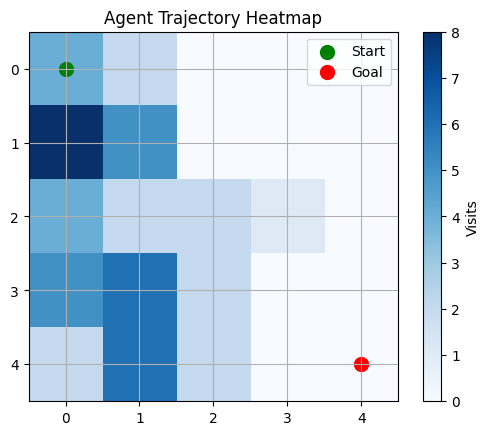

In [20]:
REWARD_ = 10

def step(state, action):
    move = ACTION_DICT[action]
    new_state = (state[0] + move[0], state[1] + move[1])
    if not is_valid_state(new_state):
        new_state = state
        reward = -1
    else:
        reward = REWARD_ if new_state == GOAL_STATE else 0
    done = (new_state == GOAL_STATE)
    return new_state, reward, done

for ep in range(EPISODE):
    traj, reward = run_episode()
    # goal_reached = traj[-1] == GOAL_STATE
    # plot_trajectory(traj, goal_reached)
    print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")

goal_reached = traj[-1] == GOAL_STATE
plot_trajectory(traj, goal_reached)

- Add bonus (e.g., +1) for reaching new cells (encourage exploration).

Episode 1: Total Reward = 17, Steps = 32
Episode 2: Total Reward = -21, Steps = 51
Episode 3: Total Reward = -2, Steps = 51
Episode 4: Total Reward = -12, Steps = 51
Episode 5: Total Reward = -9, Steps = 51
Episode 6: Total Reward = 3, Steps = 24
Episode 7: Total Reward = -9, Steps = 51
Episode 8: Total Reward = -16, Steps = 51
Episode 9: Total Reward = -7, Steps = 51
Episode 10: Total Reward = 4, Steps = 51


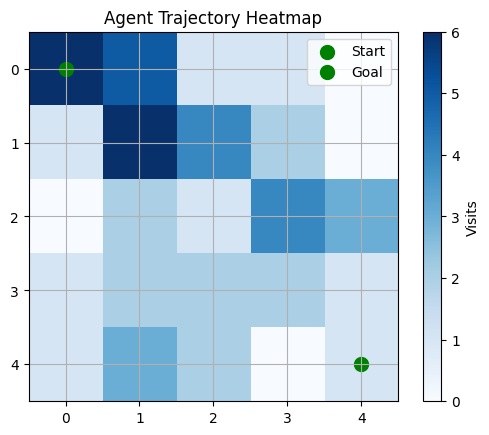

In [21]:
REWARD_GOAL = 10
REWARD_NEW = 1 

visited_states = set()

def step(state, action):
    move = ACTION_DICT[action]
    new_state = (state[0] + move[0], state[1] + move[1])
    if not is_valid_state(new_state):
        new_state = state
        reward = -1
    elif new_state == GOAL_STATE:
        reward = REWARD_GOAL
    elif new_state not in visited_states:
        visited_states.add(new_state)
        reward = REWARD_NEW
    else:
        reward = 0  
    done = (new_state == GOAL_STATE)
    return new_state, reward, done

for ep in range(EPISODE):
    traj, reward = run_episode()
    # goal_reached = traj[-1] == GOAL_STATE
    print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")
goal_reached = traj[-1] == GOAL_STATE
plot_trajectory(traj, goal_reached)

- Make the grid 6×6 or 8×8. Does the agent still reach the goal?

Episode 1: Total Reward = 6, Steps = 41
Episode 2: Total Reward = 4, Steps = 30
Episode 3: Total Reward = -10, Steps = 51
Episode 4: Total Reward = -6, Steps = 51
Episode 5: Total Reward = 10, Steps = 39
Episode 6: Total Reward = -3, Steps = 51
Episode 7: Total Reward = -3, Steps = 51
Episode 8: Total Reward = -6, Steps = 51
Episode 9: Total Reward = 6, Steps = 27
Episode 10: Total Reward = -4, Steps = 51


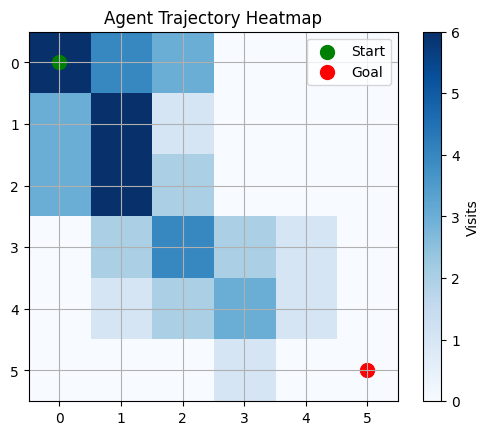

In [22]:
GRID_SIZE = 6
GOAL_STATE = (5, 5)

for ep in range(EPISODE):
    traj, reward = run_episode()
    # goal_reached = traj[-1] == GOAL_STATE
    # plot_trajectory(traj, goal_reached)
    print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")
goal_reached = traj[-1] == GOAL_STATE
plot_trajectory(traj, goal_reached)

- Add bonus goal states or trap states (–10). See how this affects path behavior.

Episode 1: Total Reward = 1, Steps = 51
Episode 2: Total Reward = 6, Steps = 25
Episode 3: Total Reward = -9, Steps = 35
Episode 4: Total Reward = -37, Steps = 51
Episode 5: Total Reward = -26, Steps = 51
Episode 6: Total Reward = -28, Steps = 51
Episode 7: Total Reward = -68, Steps = 51
Episode 8: Total Reward = -108, Steps = 51
Episode 9: Total Reward = -24, Steps = 29
Episode 10: Total Reward = -25, Steps = 51


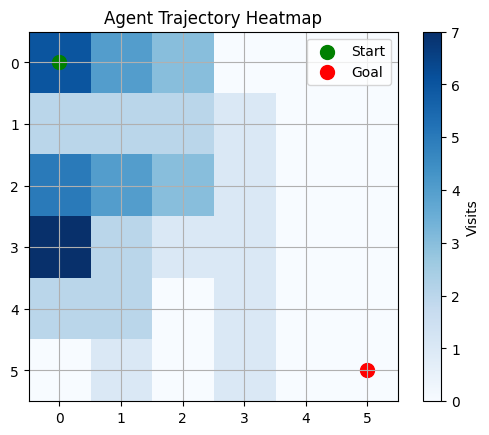

In [42]:
TRAP_STATES = [(1,1), (2,5), (3,4)]

visited_states = set()

def step(state, action):
    move = ACTION_DICT[action]
    new_state = (state[0] + move[0], state[1] + move[1])
    if not is_valid_state(new_state):
        new_state = state
        reward = -1
    elif new_state == GOAL_STATE:
        reward = REWARD_GOAL
    elif new_state not in visited_states:
        visited_states.add(new_state)
        reward = REWARD_NEW
    elif new_state in TRAP_STATES:
        reward = -10
    else:
        reward = 0  
    done = (new_state == GOAL_STATE)
    return new_state, reward, done

for ep in range(EPISODE):
    traj, reward = run_episode()
    # goal_reached = traj[-1] == GOAL_STATE
    print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")
goal_reached = traj[-1] == GOAL_STATE
plot_trajectory(traj, goal_reached)

- Over 100 episodes, how many times does the agent reach the goal? 
<br/>

In [24]:

# import numpy as np
# import matplotlib.pyplot as plt

# # Gridworld Environment Setup
# GRID_SIZE = 5  # Define the size of the grid (5x5)
# ACTIONS = ['up', 'down', 'left', 'right']  # Possible actions the agent can take
# ACTION_DICT = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}  # Map actions to state changes
# GOAL_STATE = (4, 4)  # Define the goal state in the grid
# MAX_STEPS = 50  # Maximum steps allowed per episode
# EPISODE = 10  # Number of episodes to simulate
# REWARD_ = 10  # Reward for reaching the goal state


# # Function to visualize the trajectory of the agent
# def plot_trajectory(trajectory, goal_reached):
#     grid = np.zeros((GRID_SIZE, GRID_SIZE))  # Initialize a grid to track visits
#     for (x, y) in trajectory:  # Increment visit count for each cell in the trajectory
#         grid[x, y] += 1
#     plt.imshow(grid, cmap='Blues', origin='upper')  # Display the grid as a heatmap
#     plt.title("Agent Trajectory Heatmap")  # Add a title to the plot
#     plt.colorbar(label="Visits")  # Add a color bar to indicate visit frequency
#     plt.scatter(0, 0, c='green', s=100, label='Start')  # Mark the start state
#     goal_color = 'green' if goal_reached else 'red'  # Change goal marker color based on goal_reached
#     plt.scatter(4, 4, c=goal_color, s=100, label='Goal')  # Mark the goal state
#     plt.legend()  # Add a legend to the plot
#     plt.grid(True)  # Display grid lines
#     plt.show()  # Show the plot

# # Function to check if a state is valid (within grid boundaries)
# def is_valid_state(state):
#     return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

# # Function to perform a step in the environment
# def step(state, action):
#     move = ACTION_DICT[action]  # Get the movement associated with the action
#     new_state = (state[0] + move[0], state[1] + move[1])  # Calculate the new state
#     if not is_valid_state(new_state):  # Check if the new state is out of bounds
#         new_state = state  # Stay in the same state if out of bounds
#     reward = REWARD_ if new_state == GOAL_STATE else 0  # Assign reward for reaching the goal state
#     done = (new_state == GOAL_STATE)  # Check if the episode is done
#     return new_state, reward, done

# # Function to simulate one episode of the agent's interaction with the environment
# def run_episode():
#     state = (0, 0)  # Initialize the agent's starting state
#     total_reward = 0  # Initialize total reward for the episode
#     trajectory = [state]  # Track the agent's trajectory
#     for step_num in range(MAX_STEPS):  # Loop for a maximum number of steps
#         action = np.random.choice(ACTIONS)  # Select an action randomly
#         next_state, reward, done = step(state, action)  # Perform the action and get the result
#         trajectory.append(next_state)  # Append the new state to the trajectory
#         total_reward += reward  # Accumulate the reward
#         state = next_state  # Update the current state
#         if done:  # Exit the loop if the goal state is reached
#             break
#     return trajectory, total_reward

# # Run multiple episodes and print results
# for ep in range(EPISODE):
#     traj, reward = run_episode()  # Simulate an episode
#     goal_reached = traj[-1] == GOAL_STATE  # Check if the goal was reached in the episode
#     plot_trajectory(traj, goal_reached)  # Visualize the trajectory with goal marker color
#     print(f"Episode {ep+1}: Total Reward = {reward}, Steps = {len(traj)}")  # Log the results


# # goal_reached = traj[-1] == GOAL_STATE  # Check if the goal was reached in the episode
# # plot_trajectory(traj, goal_reached)  # Visualize the trajectory with goal marker color